# Geometric Transformations of Images

## Goals

- 이미지에 기하학적 변환을 적용하는 방법을 배운다 : 이동, 회전, affine transformation 등
- 함수의 사용법을 배운다 : `cv2.getPerspectiveTransform`

## Transformations

OpenCV는 2가지 변환 함수(`cv2.warpAffine`, `cv2.warpPerspective`)를 제공한다. 이를 통해 모든 변환을 수행할 수 있다.

`cv2.warpAffine`은 입력으로 2x3 변환 행렬을 받는 반면, `cv2.warpPerspective`는 3x3 변환 행렬을 받는다.

### Scaling

Scaling은 이미지를 단순히 resizing 하는 것이다. 

OpenCV에서는 `cv2.resize()` 함수를 사용하면 된다. 이때, 함수에 인자로 이미지의 크기 또는 scaling factor가 주어져야 한다.

resizing에는 여러가지 interpolation 방법들이 사용된다. 선호되는 방법으로는 크기를 줄일 때(shrink)에는 `cv2.INTER_AREA`, 크게할 때(zoom)에는 `cv2.INTER_CUBIC`(느림)와 `cv2.INTER_LINEAR`가 있다. 함수에 기본으로 설정된 방법은 `cv2.INTER_LINEAR` 이다.

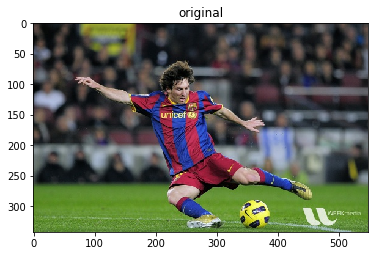

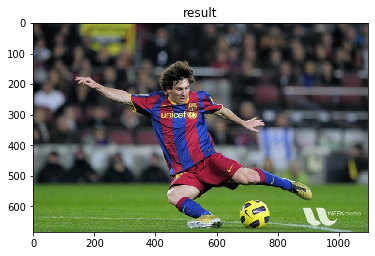

In [1]:
# 이미지 확대(zoom)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/messi5.jpg')

# scaling factor를 전달하는 방법
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# 직접 크기를 전달하는 방법
# height, width = img.shape[:2]
# res = cv2.resize(img, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("original")
plt.show()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title("result")
plt.show()

변화가 없는 것 같지만 좌표를 보면 크기가 늘어난 것을 확인할 수 있다.

### Translation

Translation은 object의 위치를 이동시키는 것이다. 만약 (x, y)방향으로의 이동(tx, ty)를 안다면, 다음의 변환 행렬 $M$을 만들 수 있다.

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

위 행렬을 `np.float32` 자료형으로 Numpy array로 만들어 `cv2.warpAffine()`에 전달하면 된다.

다음 예제는 (100, 50)의 이동을 하는 예제이다.

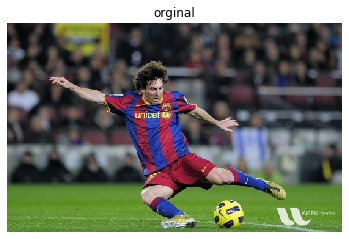

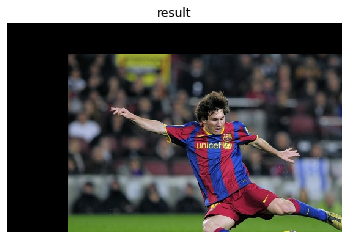

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/messi5.jpg')
rows, cols = img.shape[:2]

tx = 100
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])

res = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("orginal"), plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title("result"), plt.axis('off')
plt.show()

#### warning

`cv2.warpAffine()` 함수의 3번째 인자는 출력 이미지의 크기이며 반드시 **(width, height)**의 형태로 전달되어야 한다.

width는 column수, height는 row수라는 것을 기억하자

### Rotation

이미지의 각 $\theta$ 만큼의 회전은 다음의 변환 행렬을 통해 이루어진다.

$$ M = \begin{bmatrix} \cos{\theta} & -\sin{\theta} \\ \sin{\theta} & -\cos{\theta} \end{bmatrix}$$

OpenCV는 회전의 중심을 고려한 회전 기능을 제공하므로, 원하는 위치 어디로든 회전시킬 수 있다. 여기에 사용되는 변환 행렬은 다음과 같다.

$$\begin{bmatrix}\alpha & \beta & (1-\alpha)\cdot center.x -\beta \cdot center.y \\ -\beta & \alpha & \beta \cdot center.x + (1-\alpha) \cdot center.y \end{bmatrix}$$

where,

$$
\alpha = scale \cdot \cos{\theta}, \beta = scale \cdot \sin{\theta}
$$

OpenCV에서는 `cv2.getRotationMatrix2D()` 함수로 이 변환 행렬을 얻을 수 있다.

다음은 scaling에 상관 없이 중심에 대해 이미지를 90도 회전시키는 예제이다.

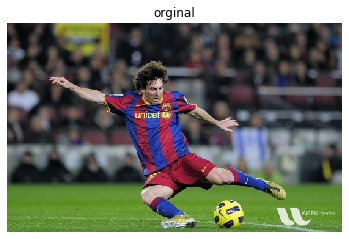

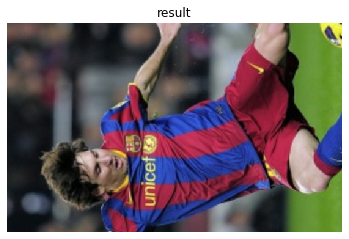

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/messi5.jpg')
rows, cols = img.shape[:2]

# scale을 2로 했는데 따로 중심을 고려하지 않았음
M = cv2.getRotationMatrix2D((((cols-1)/2.0), ((rows-1)/2.0)), 90, 2)
res = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("orginal"), plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title("result"), plt.axis('off')
plt.show()

### Affine Transformation

affine transformation에서는 원본 이미지의 평행한 선들이 출력 이미지에서도 그대로 평행을 유지한다. 

먼저, 변환 행렬을 얻기 위해서는 입력 이미지의 3개의 점과 그 점의 위치에 해당하는 출력 이미지의 3개의 점이 필요하다. 이를 `cv2.getAffineTransform()` 함수에 인자로 전달하면 2x3 크기의 변환 행렬을 얻을 수 있다.

구해진 변환 행렬을 `cv2.warpAffine()`함수에 전달하면 affine transform을 수행할 수 있다.

다음은 affine transform을 수행하는 예제이다. 이 예제에서 선택한 세 점은 초록색으로 표시하였다.

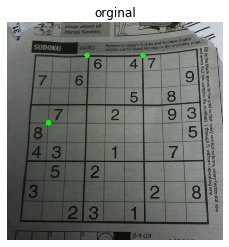

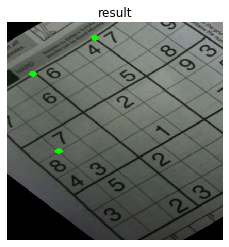

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[155,65],[263,65],[80,195]])
pts2 = np.float32([[50,100],[170,30],[100,250]])

# 점 찍기
for point in pts1:
    cv2.circle(img, tuple(point), 5, (0, 255, 0), -1)

M = cv2.getAffineTransform(pts1, pts2)

res = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("orginal"), plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title("result"), plt.axis('off')
plt.show()

### Perspective Transformation

perspective transformation에는 3x3 크기의 변환 행렬이 필요하다. 변환 후에도 원본 이미지의 직선은 그대로 직선을 유지한다.

변환 행렬을 얻기 위해서는 입력 이미지의 4개의 점과 그 점의 위치에 해당하는 출력 이미지의 4개의 점이 필요하다. 이 4개의 점 중에서 3개의 점은 collinear하지 않아도 된다.

이 점들을 `cv2.getPerspectiveTransform()`에 전달하면, 변환 행렬을 얻을 수 이;ㅆ다. 그리고 이 3x3 변환 행렬을 `cv2.warpPerspective()`에 전달하면 된다.

다음은 perspective transformation 예제이다.

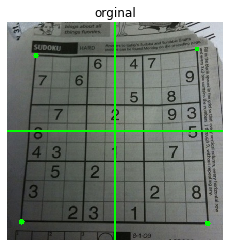

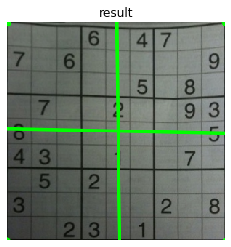

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg')
rows, cols = img.shape[:2]

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# 직선 그리기(수직, 수평)
cv2.line(img, (0, (rows-1)//2), (cols-1, (rows-1)//2), (0, 255, 0), 3)
cv2.line(img, ((cols-1)//2, 0), ((cols-1)//2, rows-1), (0, 255, 0), 3)

# 4개의 점 찍기
for point in pts1:
    cv2.circle(img, tuple(point), 5, (0, 255, 0), -1)
    

M = cv2.getPerspectiveTransform(pts1, pts2)

res = cv2.warpPerspective(img, M, (300, 300))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title("orginal"), plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), plt.title("result"), plt.axis('off')
plt.show()